In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

In [17]:
data = np.loadtxt(open("美国各州\\美国各州\\arkansas-history.csv","rb"),str,delimiter=",")

In [18]:
#确定数据中所需要的列
data[0][[0,3,6,20,28,31]]

array(['"date"', '"deathConfirmed"', '"hospitalized"',
       '"positiveCasesViral"', '"recovered"', '"totalTestResults"'],
      dtype='<U34')

In [21]:
#将时间数据列信息部分单独拿出，数据类型为str
use_data1=data[1:170,[0]][::-1]
use_data1=[[str(j) for j in i] for i in use_data1]
#将其余数据信息部分拿出，数据类型为float
use_data2=data[1:170,(3,6,20,28,31)][::-1]
use_data2=[[float(j) for j in i] for i in use_data2]
#用list可包含不同类型元素的属性将上述两个信息进行横向合并
use_data=[]
for i in range(len(use_data1)):
    use_data.append(use_data1[i]+use_data2[i])
#头信息
head=list([list(data[0,(0,3,6,20,28,31)])])
#将头信息与列表信息进行纵向合并
use_data_with_head=head+use_data

In [23]:
#搭建样本集与标签集
x_train = []
y_train = []
for i in range(150):
    x_train.append([use_data2[i],use_data2[i+1]])
    y_train.append(use_data2[i+2])
x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(150, 2, 5)
(150, 5)


In [24]:
np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)
 
# 使x_train符合SimpleRNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
# 此处整个数据集送入，送入样本数为len(x_train)；输入4个字母出结果，循环核时间展开步数为4; 表示为独热码有5个输入特征，每个时间步输入特征个数为5
x_train = np.reshape(x_train, (len(x_train), 2, 5))  #四个字母通过4个连续的时刻送入网络，所以时间展开步数是4
y_train = np.array(y_train)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(3),  #记忆体个数越多记忆力越好，但是占用资源更多
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5) #实现了yt的计算
])
 
model.compile(optimizer=tf.keras.optimizers.Adam(100),
              loss=tf.keras.losses.mse,
              metrics=['MeanSquaredError'])


In [35]:
checkpoint_save_path = "./checkpoint/传染病模型.ckpt"
 
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)
 
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='loss')  # 由于fit没有给出测试集，不计算测试集准确率，根据loss，保存最优模型

history = model.fit(x_train, y_train, batch_size=20, epochs=1000, callbacks=[cp_callback])
 
model.summary()

-------------load the model-----------------
Epoch 1/1000
8/8 [==============================] - 0s 29ms/step - loss: 138515726336.0000 - mean_squared_error: 138515726336.0000
Epoch 2/1000
8/8 [==============================] - 1s 71ms/step - loss: 138514153472.0000 - mean_squared_error: 138514153472.0000
Epoch 3/1000
8/8 [==============================] - 0s 32ms/step - loss: 138512678912.0000 - mean_squared_error: 138512678912.0000
Epoch 4/1000
8/8 [==============================] - 0s 59ms/step - loss: 138511187968.0000 - mean_squared_error: 138511187968.0000
Epoch 5/1000
8/8 [==============================] - 0s 17ms/step - loss: 138509647872.0000 - mean_squared_error: 138509647872.0000
Epoch 6/1000
8/8 [==============================] - 0s 17ms/step - loss: 138508173312.0000 - mean_squared_error: 138508173312.0000
Epoch 7/1000
8/8 [==============================] - 0s 16ms/step - loss: 138506665984.0000 - mean_squared_error: 138506665984.0000
Epoch 8/1000
8/8 [====================

8/8 [==============================] - 0s 16ms/step - loss: 138424156160.0000 - mean_squared_error: 138424156160.0000
Epoch 63/1000
8/8 [==============================] - 0s 22ms/step - loss: 138422681600.0000 - mean_squared_error: 138422681600.0000
Epoch 64/1000
8/8 [==============================] - 0s 19ms/step - loss: 138421190656.0000 - mean_squared_error: 138421190656.0000
Epoch 65/1000
8/8 [==============================] - 0s 22ms/step - loss: 138419699712.0000 - mean_squared_error: 138419699712.0000
Epoch 66/1000
8/8 [==============================] - 1s 109ms/step - loss: 138418126848.0000 - mean_squared_error: 138418126848.0000
Epoch 67/1000
8/8 [==============================] - 0s 38ms/step - loss: 138416701440.0000 - mean_squared_error: 138416701440.0000
Epoch 68/1000
8/8 [==============================] - 0s 16ms/step - loss: 138415226880.0000 - mean_squared_error: 138415226880.0000
Epoch 69/1000
8/8 [==============================] - 0s 28ms/step - loss: 138413637632.00

Epoch 124/1000
8/8 [==============================] - 1s 133ms/step - loss: 138331242496.0000 - mean_squared_error: 138331242496.0000
Epoch 125/1000
8/8 [==============================] - 0s 35ms/step - loss: 138329784320.0000 - mean_squared_error: 138329767936.0000
Epoch 126/1000
8/8 [==============================] - 0s 17ms/step - loss: 138328244224.0000 - mean_squared_error: 138328244224.0000
Epoch 127/1000
8/8 [==============================] - 0s 18ms/step - loss: 138326720512.0000 - mean_squared_error: 138326720512.0000
Epoch 128/1000
8/8 [==============================] - 0s 27ms/step - loss: 138325229568.0000 - mean_squared_error: 138325229568.0000
Epoch 129/1000
8/8 [==============================] - 0s 21ms/step - loss: 138323787776.0000 - mean_squared_error: 138323787776.0000
Epoch 130/1000
8/8 [==============================] - 0s 20ms/step - loss: 138322296832.0000 - mean_squared_error: 138322296832.0000
Epoch 131/1000
8/8 [==============================] - 0s 17ms/step -

8/8 [==============================] - 0s 18ms/step - loss: 138239852544.0000 - mean_squared_error: 138239852544.0000
Epoch 186/1000
8/8 [==============================] - 0s 23ms/step - loss: 138238361600.0000 - mean_squared_error: 138238361600.0000
Epoch 187/1000
8/8 [==============================] - 0s 16ms/step - loss: 138236887040.0000 - mean_squared_error: 138236887040.0000
Epoch 188/1000
8/8 [==============================] - 0s 56ms/step - loss: 138235428864.0000 - mean_squared_error: 138235428864.0000
Epoch 189/1000
8/8 [==============================] - 0s 64ms/step - loss: 138233905152.0000 - mean_squared_error: 138233905152.0000
Epoch 190/1000
8/8 [==============================] - 0s 18ms/step - loss: 138232414208.0000 - mean_squared_error: 138232414208.0000
Epoch 191/1000
8/8 [==============================] - 0s 63ms/step - loss: 138230923264.0000 - mean_squared_error: 138230923264.0000
Epoch 192/1000
8/8 [==============================] - 0s 68ms/step - loss: 138229399

8/8 [==============================] - 0s 20ms/step - loss: 138148626432.0000 - mean_squared_error: 138148626432.0000
Epoch 247/1000
8/8 [==============================] - 0s 18ms/step - loss: 138147102720.0000 - mean_squared_error: 138147102720.0000
Epoch 248/1000
8/8 [==============================] - 1s 77ms/step - loss: 138145660928.0000 - mean_squared_error: 138145660928.0000
Epoch 249/1000
8/8 [==============================] - 0s 16ms/step - loss: 138144137216.0000 - mean_squared_error: 138144137216.0000
Epoch 250/1000
8/8 [==============================] - 0s 20ms/step - loss: 138142646272.0000 - mean_squared_error: 138142646272.0000
Epoch 251/1000
8/8 [==============================] - 0s 20ms/step - loss: 138141138944.0000 - mean_squared_error: 138141155328.0000
Epoch 252/1000
8/8 [==============================] - 0s 20ms/step - loss: 138139648000.0000 - mean_squared_error: 138139648000.0000
Epoch 253/1000
8/8 [==============================] - 0s 22ms/step - loss: 138138173

8/8 [==============================] - 0s 17ms/step - loss: 138057416704.0000 - mean_squared_error: 138057416704.0000
Epoch 308/1000
8/8 [==============================] - 0s 24ms/step - loss: 138055925760.0000 - mean_squared_error: 138055925760.0000
Epoch 309/1000
8/8 [==============================] - 0s 17ms/step - loss: 138054418432.0000 - mean_squared_error: 138054434816.0000
Epoch 310/1000
8/8 [==============================] - 0s 36ms/step - loss: 138052911104.0000 - mean_squared_error: 138052911104.0000
Epoch 311/1000
8/8 [==============================] - 0s 18ms/step - loss: 138051452928.0000 - mean_squared_error: 138051452928.0000
Epoch 312/1000
8/8 [==============================] - 0s 15ms/step - loss: 138049945600.0000 - mean_squared_error: 138049945600.0000
Epoch 313/1000
8/8 [==============================] - 0s 20ms/step - loss: 138048421888.0000 - mean_squared_error: 138048421888.0000
Epoch 314/1000
8/8 [==============================] - 0s 19ms/step - loss: 138046980

8/8 [==============================] - 0s 19ms/step - loss: 137966239744.0000 - mean_squared_error: 137966239744.0000
Epoch 369/1000
8/8 [==============================] - 0s 22ms/step - loss: 137964683264.0000 - mean_squared_error: 137964683264.0000
Epoch 370/1000
8/8 [==============================] - 0s 15ms/step - loss: 137963192320.0000 - mean_squared_error: 137963208704.0000
Epoch 371/1000
8/8 [==============================] - 0s 21ms/step - loss: 137961668608.0000 - mean_squared_error: 137961668608.0000
Epoch 372/1000
8/8 [==============================] - 0s 22ms/step - loss: 137960177664.0000 - mean_squared_error: 137960177664.0000
Epoch 373/1000
8/8 [==============================] - 0s 19ms/step - loss: 137958735872.0000 - mean_squared_error: 137958735872.0000
Epoch 374/1000
8/8 [==============================] - 0s 20ms/step - loss: 137957228544.0000 - mean_squared_error: 137957228544.0000
Epoch 375/1000
8/8 [==============================] - 0s 16ms/step - loss: 137955721

8/8 [==============================] - 0s 37ms/step - loss: 137875111936.0000 - mean_squared_error: 137875111936.0000
Epoch 430/1000
8/8 [==============================] - 0s 41ms/step - loss: 137873604608.0000 - mean_squared_error: 137873604608.0000
Epoch 431/1000
8/8 [==============================] - 0s 33ms/step - loss: 137872146432.0000 - mean_squared_error: 137872146432.0000
Epoch 432/1000
8/8 [==============================] - 0s 16ms/step - loss: 137870655488.0000 - mean_squared_error: 137870655488.0000
Epoch 433/1000
8/8 [==============================] - 0s 19ms/step - loss: 137869115392.0000 - mean_squared_error: 137869115392.0000
Epoch 434/1000
8/8 [==============================] - 0s 17ms/step - loss: 137867673600.0000 - mean_squared_error: 137867673600.0000
Epoch 435/1000
8/8 [==============================] - 0s 19ms/step - loss: 137866133504.0000 - mean_squared_error: 137866133504.0000
Epoch 436/1000
8/8 [==============================] - 0s 17ms/step - loss: 137864626

8/8 [==============================] - 0s 16ms/step - loss: 137784033280.0000 - mean_squared_error: 137784033280.0000
Epoch 491/1000
8/8 [==============================] - 0s 24ms/step - loss: 137782509568.0000 - mean_squared_error: 137782509568.0000
Epoch 492/1000
8/8 [==============================] - 0s 20ms/step - loss: 137781051392.0000 - mean_squared_error: 137781051392.0000
Epoch 493/1000
8/8 [==============================] - 0s 19ms/step - loss: 137779576832.0000 - mean_squared_error: 137779576832.0000
Epoch 494/1000
8/8 [==============================] - 0s 60ms/step - loss: 137778085888.0000 - mean_squared_error: 137778085888.0000
Epoch 495/1000
8/8 [==============================] - 0s 41ms/step - loss: 137776562176.0000 - mean_squared_error: 137776562176.0000
Epoch 496/1000
8/8 [==============================] - 1s 79ms/step - loss: 137775120384.0000 - mean_squared_error: 137775120384.0000
Epoch 497/1000
8/8 [==============================] - 0s 38ms/step - loss: 137773596

8/8 [==============================] - 0s 31ms/step - loss: 137693036544.0000 - mean_squared_error: 137693036544.0000
Epoch 552/1000
8/8 [==============================] - 1s 88ms/step - loss: 137691529216.0000 - mean_squared_error: 137691529216.0000
Epoch 553/1000
8/8 [==============================] - 0s 37ms/step - loss: 137690038272.0000 - mean_squared_error: 137690038272.0000
Epoch 554/1000
8/8 [==============================] - 0s 17ms/step - loss: 137688547328.0000 - mean_squared_error: 137688547328.0000
Epoch 555/1000
8/8 [==============================] - 0s 61ms/step - loss: 137687040000.0000 - mean_squared_error: 137687040000.0000
Epoch 556/1000
8/8 [==============================] - 0s 36ms/step - loss: 137685516288.0000 - mean_squared_error: 137685516288.0000
Epoch 557/1000
8/8 [==============================] - 0s 19ms/step - loss: 137684074496.0000 - mean_squared_error: 137684074496.0000
Epoch 558/1000
8/8 [==============================] - 0s 16ms/step - loss: 137682583

8/8 [==============================] - 0s 29ms/step - loss: 137602072576.0000 - mean_squared_error: 137602072576.0000
Epoch 613/1000
8/8 [==============================] - 0s 15ms/step - loss: 137600598016.0000 - mean_squared_error: 137600598016.0000
Epoch 614/1000
8/8 [==============================] - 0s 19ms/step - loss: 137599139840.0000 - mean_squared_error: 137599139840.0000
Epoch 615/1000
8/8 [==============================] - 1s 111ms/step - loss: 137597632512.0000 - mean_squared_error: 137597632512.0000
Epoch 616/1000
8/8 [==============================] - 0s 16ms/step - loss: 137596125184.0000 - mean_squared_error: 137596125184.0000
Epoch 617/1000
8/8 [==============================] - 0s 28ms/step - loss: 137594650624.0000 - mean_squared_error: 137594650624.0000
Epoch 618/1000
8/8 [==============================] - 0s 16ms/step - loss: 137593110528.0000 - mean_squared_error: 137593110528.0000
Epoch 619/1000
8/8 [==============================] - 0s 25ms/step - loss: 13759165

8/8 [==============================] - 0s 21ms/step - loss: 137511190528.0000 - mean_squared_error: 137511190528.0000
Epoch 674/1000
8/8 [==============================] - 0s 16ms/step - loss: 137509666816.0000 - mean_squared_error: 137509650432.0000
Epoch 675/1000
8/8 [==============================] - 0s 19ms/step - loss: 137508241408.0000 - mean_squared_error: 137508241408.0000
Epoch 676/1000
8/8 [==============================] - 1s 77ms/step - loss: 137506734080.0000 - mean_squared_error: 137506734080.0000
Epoch 677/1000
8/8 [==============================] - 0s 20ms/step - loss: 137505226752.0000 - mean_squared_error: 137505226752.0000
Epoch 678/1000
8/8 [==============================] - 0s 23ms/step - loss: 137503768576.0000 - mean_squared_error: 137503768576.0000
Epoch 679/1000
8/8 [==============================] - 0s 31ms/step - loss: 137502277632.0000 - mean_squared_error: 137502277632.0000
Epoch 680/1000
8/8 [==============================] - 0s 20ms/step - loss: 137500803

8/8 [==============================] - 0s 41ms/step - loss: 137420333056.0000 - mean_squared_error: 137420333056.0000
Epoch 735/1000
8/8 [==============================] - 0s 24ms/step - loss: 137418874880.0000 - mean_squared_error: 137418874880.0000
Epoch 736/1000
8/8 [==============================] - 0s 36ms/step - loss: 137417392128.0000 - mean_squared_error: 137417392128.0000
Epoch 737/1000
8/8 [==============================] - 1s 76ms/step - loss: 137415884800.0000 - mean_squared_error: 137415884800.0000
Epoch 738/1000
8/8 [==============================] - 0s 27ms/step - loss: 137414377472.0000 - mean_squared_error: 137414377472.0000
Epoch 739/1000
8/8 [==============================] - 0s 36ms/step - loss: 137412902912.0000 - mean_squared_error: 137412902912.0000
Epoch 740/1000
8/8 [==============================] - 0s 30ms/step - loss: 137411436544.0000 - mean_squared_error: 137411436544.0000
Epoch 741/1000
8/8 [==============================] - 0s 41ms/step - loss: 137409953

8/8 [==============================] - 0s 20ms/step - loss: 137329582080.0000 - mean_squared_error: 137329582080.0000
Epoch 796/1000
8/8 [==============================] - 0s 21ms/step - loss: 137328099328.0000 - mean_squared_error: 137328099328.0000
Epoch 797/1000
8/8 [==============================] - 0s 20ms/step - loss: 137326657536.0000 - mean_squared_error: 137326657536.0000
Epoch 798/1000
8/8 [==============================] - 0s 24ms/step - loss: 137325060096.0000 - mean_squared_error: 137325060096.0000
Epoch 799/1000
8/8 [==============================] - 0s 17ms/step - loss: 137323634688.0000 - mean_squared_error: 137323634688.0000
Epoch 800/1000
8/8 [==============================] - 0s 18ms/step - loss: 137322143744.0000 - mean_squared_error: 137322143744.0000
Epoch 801/1000
8/8 [==============================] - 0s 18ms/step - loss: 137320677376.0000 - mean_squared_error: 137320677376.0000
Epoch 802/1000
8/8 [==============================] - 0s 17ms/step - loss: 137319178

8/8 [==============================] - 0s 18ms/step - loss: 137238913024.0000 - mean_squared_error: 137238913024.0000
Epoch 857/1000
8/8 [==============================] - 0s 20ms/step - loss: 137237405696.0000 - mean_squared_error: 137237405696.0000
Epoch 858/1000
8/8 [==============================] - 0s 23ms/step - loss: 137235963904.0000 - mean_squared_error: 137235963904.0000
Epoch 859/1000
8/8 [==============================] - 0s 19ms/step - loss: 137234464768.0000 - mean_squared_error: 137234464768.0000
Epoch 860/1000
8/8 [==============================] - 0s 42ms/step - loss: 137232982016.0000 - mean_squared_error: 137232982016.0000
Epoch 861/1000
8/8 [==============================] - 1s 103ms/step - loss: 137231474688.0000 - mean_squared_error: 137231491072.0000
Epoch 862/1000
8/8 [==============================] - 0s 20ms/step - loss: 137229991936.0000 - mean_squared_error: 137229991936.0000
Epoch 863/1000
8/8 [==============================] - 1s 74ms/step - loss: 13722848

8/8 [==============================] - 1s 80ms/step - loss: 137148260352.0000 - mean_squared_error: 137148260352.0000
Epoch 918/1000
8/8 [==============================] - 0s 58ms/step - loss: 137146736640.0000 - mean_squared_error: 137146736640.0000
Epoch 919/1000
8/8 [==============================] - 0s 24ms/step - loss: 137145237504.0000 - mean_squared_error: 137145237504.0000
Epoch 920/1000
8/8 [==============================] - 0s 17ms/step - loss: 137143771136.0000 - mean_squared_error: 137143771136.0000
Epoch 921/1000
8/8 [==============================] - 0s 18ms/step - loss: 137142304768.0000 - mean_squared_error: 137142304768.0000
Epoch 922/1000
8/8 [==============================] - 0s 21ms/step - loss: 137140822016.0000 - mean_squared_error: 137140822016.0000
Epoch 923/1000
8/8 [==============================] - 0s 20ms/step - loss: 137139412992.0000 - mean_squared_error: 137139412992.0000
Epoch 924/1000
8/8 [==============================] - 0s 15ms/step - loss: 137137790

8/8 [==============================] - 0s 21ms/step - loss: 137057705984.0000 - mean_squared_error: 137057705984.0000
Epoch 979/1000
8/8 [==============================] - 0s 23ms/step - loss: 137056198656.0000 - mean_squared_error: 137056198656.0000
Epoch 980/1000
8/8 [==============================] - 0s 16ms/step - loss: 137054715904.0000 - mean_squared_error: 137054715904.0000
Epoch 981/1000
8/8 [==============================] - 0s 20ms/step - loss: 137053233152.0000 - mean_squared_error: 137053233152.0000
Epoch 982/1000
8/8 [==============================] - 0s 59ms/step - loss: 137051734016.0000 - mean_squared_error: 137051734016.0000
Epoch 983/1000
8/8 [==============================] - 0s 18ms/step - loss: 137050226688.0000 - mean_squared_error: 137050226688.0000
Epoch 984/1000
8/8 [==============================] - 0s 18ms/step - loss: 137048825856.0000 - mean_squared_error: 137048825856.0000
Epoch 985/1000
8/8 [==============================] - 0s 20ms/step - loss: 137047277

169
169


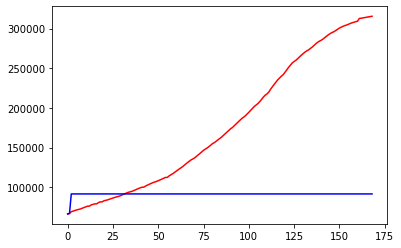

In [36]:
x_true=list(range(169))
print(len(x_true))
y_true=[i[3] for i in use_data2]
print(len(y_true))
plt.plot(x_true,y_true,'r')
y_predict=[]
y_predict.append(use_data2[0])
y_predict.append(use_data2[1])
y0=use_data2[0]
y1=use_data2[1]
for i in range(169):
    input_data=np.array([y0,y1]).reshape(1,2,-1)
    y=model(input_data)
    y=y.numpy().tolist()[0]
    y_predict.append(y.copy())
    y0=y1.copy()
    y1=y.copy()
    
    
    
    
y_plot=[i[3] for i in y_predict[:169]]
plt.plot(x_true,y_plot,'b')

In [30]:
input_data=np.array([y_predict[-2],y_predict[-1]]).reshape(1,2,-1)
y=model(input_data)
y.numpy().tolist()[0]

[2574.649169921875, 15266.33984375, 149273.125, 88545.1171875, 1113681.0]